In [1]:
# Observations
# 1 Rural city type has the lowerst % of rides, number of drivers, total fare, and the highest avearge fare.
# 2 Surburban city type average fare is generally higher than the urban type.
# 3 Urban city type has the highest % of rides, number of drivers, total fare, and the lowest average fare.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
ride_data = os.path.join('raw_data', 'ride_data.csv')
city_data = os.path.join('raw_data', 'city_data.csv')

ride_data_df = pd.read_csv(ride_data)
city_data_df = pd.read_csv(city_data)

rides_df = ride_data_df.groupby("city")["fare"].agg({"Average Fare ($)": "mean", "Total Fare ($)": "sum","Rides" : "count"}).reset_index()
pyber_df = pd.merge(city_data_df, rides_df,
                    on='city')
pyber_df.head()


C:\Users\JenChen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,city,driver_count,type,Average Fare ($),Total Fare ($),Rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


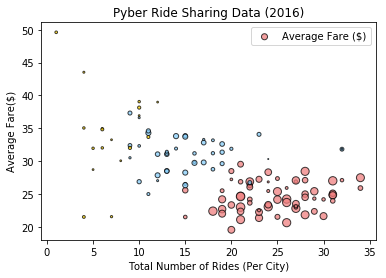

In [4]:
# bubble chart
colors = {"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural":"gold"}
plt.scatter(pyber_df["Rides"], pyber_df["Average Fare ($)"], s = pyber_df["driver_count"], c=[colors[i] for i in pyber_df["type"]], alpha=0.75, linewidths=1, edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()
plt.show()


In [5]:
city_type_df = pyber_df.groupby("type").sum()
city_type_df

,driver_count,Average Fare ($),Total Fare ($),Rides
type,,,,
Rural,104,615.728572,4255.09,125
Suburban,638,1300.433953,20335.69,657
Urban,2607,1623.863390,40078.34,1625


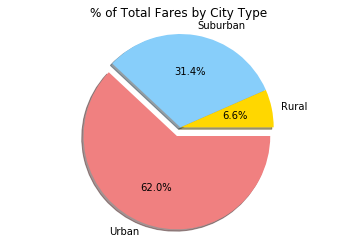

In [6]:
# Pie Chart Total fares by City Type
pie_colors = ["gold","lightskyblue","lightcoral"]
labels=["Rural","Suburban","Urban"]
explode = (0.1, 0, 0)
plt.pie(city_type_df["Total Fare ($)"],autopct="%1.1f%%",explode = (0,0,0.1),labels=labels, colors=pie_colors, shadow=True)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

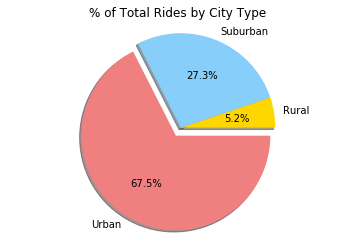

In [7]:
# Pie Chart Total Rides by City Type
pie_colors = ["gold","lightskyblue","lightcoral"]
labels=["Rural","Suburban","Urban"]
explode = (0.1, 0, 0)
plt.pie(city_type_df["Rides"],autopct="%1.1f%%",explode = (0,0,0.1),labels=labels, colors=pie_colors, shadow=True)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

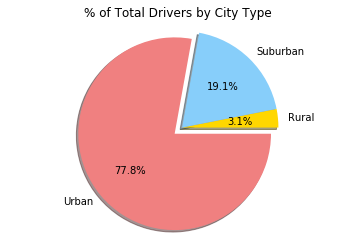

In [8]:
# Pie Chart Total Drivers by City Type
pie_colors = ["gold","lightskyblue","lightcoral"]
labels=["Rural","Suburban","Urban"]
explode = (0.1, 0, 0)
plt.pie(city_type_df["driver_count"],autopct="%1.1f%%",explode = (0,0,0.1),labels=labels, colors=pie_colors, shadow=True)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()